<div style="text-align: center;"> <h3>Data Mining and Wrangling</h3>
<h5>Formative Assessment 2</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

In [2]:
library(tidyverse)
library(ggplot2)
library(tidyr)
options(scipen=0)
library(readr)
library(ggthemes)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Import

In [3]:
df_who <- who
print(df_who)

# A tibble: 7,240 x 60
   country  iso2  iso3   year new_sp_m014 new_sp_m1524 new_sp_m2534 new_sp_m3544
   <chr>    <chr> <chr> <dbl>       <dbl>        <dbl>        <dbl>        <dbl>
 1 Afghani~ AF    AFG    1980          NA           NA           NA           NA
 2 Afghani~ AF    AFG    1981          NA           NA           NA           NA
 3 Afghani~ AF    AFG    1982          NA           NA           NA           NA
 4 Afghani~ AF    AFG    1983          NA           NA           NA           NA
 5 Afghani~ AF    AFG    1984          NA           NA           NA           NA
 6 Afghani~ AF    AFG    1985          NA           NA           NA           NA
 7 Afghani~ AF    AFG    1986          NA           NA           NA           NA
 8 Afghani~ AF    AFG    1987          NA           NA           NA           NA
 9 Afghani~ AF    AFG    1988          NA           NA           NA           NA
10 Afghani~ AF    AFG    1989          NA           NA           NA           NA
# i 7

In [4]:
df_pop <- read.csv("Population.csv", skip = 3)
print(paste("Shape:",nrow(df_pop), "x", ncol(df_pop)))
print(head(df_pop, 3))

[1] "Shape: 266 x 69"
                 Country.Name Country.Code    Indicator.Name Indicator.Code
1                       Aruba          ABW Population, total    SP.POP.TOTL
2 Africa Eastern and Southern          AFE Population, total    SP.POP.TOTL
3                 Afghanistan          AFG Population, total    SP.POP.TOTL
      X1960     X1961     X1962     X1963     X1964     X1965     X1966
1     54922     55578     56320     57002     57619     58190     58694
2 130072080 133534923 137171659 140945536 144904094 149033472 153281203
3   9035043   9214083   9404406   9604487   9814318  10036008  10266395
      X1967     X1968     X1969     X1970     X1971     X1972     X1973
1     58990     59069     59052     58950     58781     58047     58299
2 157704381 162329396 167088245 171984985 177022314 182126556 187524135
3  10505959  10756922  11017409  11290128  11567667  11853696  12157999
      X1974     X1975     X1976     X1977     X1978     X1979     X1980
1     58349     58295     

#### Shapes
`population` dataset have *266 rows and 69 columns*

`who` dataset have *7240 rows and 60 columns*

#### Summary

In [5]:
print(sapply(df_pop, class))

  Country.Name   Country.Code Indicator.Name Indicator.Code          X1960 
   "character"    "character"    "character"    "character"      "numeric" 
         X1961          X1962          X1963          X1964          X1965 
     "numeric"      "numeric"      "numeric"      "numeric"      "numeric" 
         X1966          X1967          X1968          X1969          X1970 
     "numeric"      "numeric"      "numeric"      "numeric"      "numeric" 
         X1971          X1972          X1973          X1974          X1975 
     "numeric"      "numeric"      "numeric"      "numeric"      "numeric" 
         X1976          X1977          X1978          X1979          X1980 
     "numeric"      "numeric"      "numeric"      "numeric"      "numeric" 
         X1981          X1982          X1983          X1984          X1985 
     "numeric"      "numeric"      "numeric"      "numeric"      "numeric" 
         X1986          X1987          X1988          X1989          X1990 
     "numeri

In [6]:
print(sapply(df_pop, function(x) sum(is.na(x))))

  Country.Name   Country.Code Indicator.Name Indicator.Code          X1960 
             0              0              0              0              2 
         X1961          X1962          X1963          X1964          X1965 
             2              2              2              2              2 
         X1966          X1967          X1968          X1969          X1970 
             2              2              2              2              2 
         X1971          X1972          X1973          X1974          X1975 
             2              2              2              2              2 
         X1976          X1977          X1978          X1979          X1980 
             2              2              2              2              2 
         X1981          X1982          X1983          X1984          X1985 
             2              2              2              2              2 
         X1986          X1987          X1988          X1989          X1990 
            

In [7]:
# df_pop[]
print(df_pop[is.na(df_pop["X1967"])])

  [1] "Not classified"     "West Bank and Gaza" "INX"               
  [4] "PSE"                "Population, total"  "Population, total" 
  [7] "SP.POP.TOTL"        "SP.POP.TOTL"        NA                  
 [10] NA                   NA                   NA                  
 [13] NA                   NA                   NA                  
 [16] NA                   NA                   NA                  
 [19] NA                   NA                   NA                  
 [22] NA                   NA                   NA                  
 [25] NA                   NA                   NA                  
 [28] NA                   NA                   NA                  
 [31] NA                   NA                   NA                  
 [34] NA                   NA                   NA                  
 [37] NA                   NA                   NA                  
 [40] NA                   NA                   NA                  
 [43] NA                   NA     

Looking at the rows with NA values, it appears that they aren't country at all. So let's drop these, along with column `X` that has 266 null values. Also, it is wise to remove the "X" values in the columns with year.

In [8]:
df_pop2 <- df_pop %>%
    filter(!is.na(X1967)) %>%
    select(-X)
popped_x <- c()
for (col in colnames(df_pop2)){
    popped_x <- append(popped_x, gsub("^X", "", col))
}
colnames(df_pop2) <- popped_x
print(sapply(df_pop2, function(x) sum(is.na(x))))

  Country.Name   Country.Code Indicator.Name Indicator.Code           1960 
             0              0              0              0              0 
          1961           1962           1963           1964           1965 
             0              0              0              0              0 
          1966           1967           1968           1969           1970 
             0              0              0              0              0 
          1971           1972           1973           1974           1975 
             0              0              0              0              0 
          1976           1977           1978           1979           1980 
             0              0              0              0              0 
          1981           1982           1983           1984           1985 
             0              0              0              0              0 
          1986           1987           1988           1989           1990 
            

## Data Transformation

### `WHO` Dataset
It is more likely that the columns of `who` dataset are values instead of variables. Let's explore this more.

In [9]:
df_who2 <- df_who %>%
    pivot_longer(cols=-c(1:4), names_to="variables", values_to="cases", values_drop_na=TRUE)
head(df_who2, 10)

country,iso2,iso3,year,variables,cases
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1997,new_sp_m1524,10
Afghanistan,AF,AFG,1997,new_sp_m2534,6
Afghanistan,AF,AFG,1997,new_sp_m3544,3
Afghanistan,AF,AFG,1997,new_sp_m4554,5
Afghanistan,AF,AFG,1997,new_sp_m5564,2
Afghanistan,AF,AFG,1997,new_sp_m65,0
Afghanistan,AF,AFG,1997,new_sp_f014,5
Afghanistan,AF,AFG,1997,new_sp_f1524,38


In [10]:
unique(df_who2$variables)

[1] "new_sp_m014"  "new_sp_m1524" "new_sp_m2534" "new_sp_m3544" "new_sp_m4554"
 [6] "new_sp_m5564" "new_sp_m65"   "new_sp_f014"  "new_sp_f1524" "new_sp_f2534"
[11] "new_sp_f3544" "new_sp_f4554" "new_sp_f5564" "new_sp_f65"   "new_sn_m014" 
[16] "new_sn_m1524" "new_sn_m2534" "new_sn_m3544" "new_sn_m4554" "new_sn_m5564"
[21] "new_sn_m65"   "new_ep_m014"  "new_ep_m1524" "new_ep_m2534" "new_ep_m3544"
[26] "new_ep_m4554" "new_ep_m5564" "new_ep_m65"   "new_sn_f014"  "newrel_m014" 
[31] "newrel_f014"  "new_sn_f1524" "new_sn_f2534" "new_sn_f3544" "new_sn_f4554"
[36] "new_sn_f5564" "new_sn_f65"   "new_ep_f014"  "new_ep_f1524" "new_ep_f2534"
[41] "new_ep_f3544" "new_ep_f4554" "new_ep_f5564" "new_ep_f65"   "newrel_m1524"
[46] "newrel_m2534" "newrel_m3544" "newrel_m4554" "newrel_m5564" "newrel_m65"  
[51] "newrel_f1524" "newrel_f2534" "newrel_f3544" "newrel_f4554" "newrel_f5564"
[56] "newrel_f65"

##### Data Structure
Looking the variables columns, it appears that there is a clear structure of values. There is however peculiar values by the end that includes the word "newrel." This doesn't make sense because all other values are divided into three. 

Fortunately there exist a data dictionary in [GitHub](https://github.com/GTB-TME/gtbreport2024/blob/main/dynamic/TB_data_dictionary_2022-05-31.csv).
"newrel" as it turns out mean "New and Relapse cases." Separating "new" and "rel" should be fine for this alligns with the structure of the rest of the values under `variables` column.

In [11]:
df_who2$variables <- gsub(pattern = "newrel", replacement = "new_rel", df_who2$variables)
unique(df_who2$variables)

[1] "new_sp_m014"   "new_sp_m1524"  "new_sp_m2534"  "new_sp_m3544" 
 [5] "new_sp_m4554"  "new_sp_m5564"  "new_sp_m65"    "new_sp_f014"  
 [9] "new_sp_f1524"  "new_sp_f2534"  "new_sp_f3544"  "new_sp_f4554" 
[13] "new_sp_f5564"  "new_sp_f65"    "new_sn_m014"   "new_sn_m1524" 
[17] "new_sn_m2534"  "new_sn_m3544"  "new_sn_m4554"  "new_sn_m5564" 
[21] "new_sn_m65"    "new_ep_m014"   "new_ep_m1524"  "new_ep_m2534" 
[25] "new_ep_m3544"  "new_ep_m4554"  "new_ep_m5564"  "new_ep_m65"   
[29] "new_sn_f014"   "new_rel_m014"  "new_rel_f014"  "new_sn_f1524" 
[33] "new_sn_f2534"  "new_sn_f3544"  "new_sn_f4554"  "new_sn_f5564" 
[37] "new_sn_f65"    "new_ep_f014"   "new_ep_f1524"  "new_ep_f2534" 
[41] "new_ep_f3544"  "new_ep_f4554"  "new_ep_f5564"  "new_ep_f65"   
[45] "new_rel_m1524" "new_rel_m2534" "new_rel_m3544" "new_rel_m4554"
[49] "new_rel_m5564" "new_rel_m65"   "new_rel_f1524" "new_rel_f2534"
[53] "new_rel_f3544" "new_rel_f4554" "new_rel_f5564" "new_rel_f65"

Now let us separate the `variables` column into three new columns, `type`, `sex`, and `age_group`.

In [12]:
df_who_tidy <- df_who2 %>%
    separate_wider_delim(variables, delim = "_", names = c("new", "type", "gender_age")) %>%
    mutate(
        sex=str_sub(gender_age, 1, 1), 
        age_group = str_sub(gender_age, 2, str_length(gender_age))) %>%
    subset(select = -c(gender_age, new))

head(df_who_tidy, 5)

country,iso2,iso3,year,type,cases,sex,age_group
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
Afghanistan,AF,AFG,1997,sp,0,m,014
Afghanistan,AF,AFG,1997,sp,10,m,1524
Afghanistan,AF,AFG,1997,sp,6,m,2534
Afghanistan,AF,AFG,1997,sp,3,m,3544
Afghanistan,AF,AFG,1997,sp,5,m,4554


### `Population` Dataset

There exist some column names that can be a value of a column `year`

In [13]:
df_pop_tidy <- df_pop2 %>%
pivot_longer(cols = c(5:ncol(df_pop2)), names_to = "year", values_to = "population") %>%
mutate(across(c(year, population), as.numeric))
head(df_pop_tidy, 5)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,year,population
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922
Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55578
Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56320
Aruba,ABW,"Population, total",SP.POP.TOTL,1963,57002
Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57619


## Join Datasets
We can join the two tables via `WHO.iso3` and `Population.Country.Code`

In [14]:
names(df_pop_tidy)[names(df_pop_tidy) == "Country.Code"] <- "iso3"
tuberculosis <- left_join(x = df_who_tidy, y = df_pop_tidy, by = c("iso3", "year"))
head(tuberculosis, 5)

country,iso2,iso3,year,type,cases,sex,age_group,Country.Name,Indicator.Name,Indicator.Code,population
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,AF,AFG,1997,sp,0,m,014,Afghanistan,"Population, total",SP.POP.TOTL,18452091
Afghanistan,AF,AFG,1997,sp,10,m,1524,Afghanistan,"Population, total",SP.POP.TOTL,18452091
Afghanistan,AF,AFG,1997,sp,6,m,2534,Afghanistan,"Population, total",SP.POP.TOTL,18452091
Afghanistan,AF,AFG,1997,sp,3,m,3544,Afghanistan,"Population, total",SP.POP.TOTL,18452091
Afghanistan,AF,AFG,1997,sp,5,m,4554,Afghanistan,"Population, total",SP.POP.TOTL,18452091


## Clean Up Data

In [15]:
tuberculosis <- tuberculosis %>%
    select(,-c("Country.Name", "Indicator.Name", "iso2", "Indicator.Code")) %>%
    drop_na()
head(tuberculosis, 5)

country,iso3,year,type,cases,sex,age_group,population
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Afghanistan,AFG,1997,sp,0,m,014,18452091
Afghanistan,AFG,1997,sp,10,m,1524,18452091
Afghanistan,AFG,1997,sp,6,m,2534,18452091
Afghanistan,AFG,1997,sp,3,m,3544,18452091
Afghanistan,AFG,1997,sp,5,m,4554,18452091


## Data Manipulation

#### Determine the total TB cases among men and women in the 21st century in the United States. Identify which sex had more cases.

In [16]:
usa_21st_century_by_gender <- tuberculosis %>%
filter(iso3=="USA", year> 2000) %>%
group_by(sex) %>%
summarise(cases = sum(cases))%>%
mutate(proportion = cases/ sum(cases))
print("Cases of TB in United States by Gender During 21st century")
usa_21st_century_by_gender

[1] "Cases of TB in United States by Gender During 21st century"


sex,cases,proportion
<chr>,<dbl>,<dbl>
f,43982,0.373517
m,73769,0.626483


As it turns out, from 2001-2013 in United States, **men are 25% more likely to acquire tubercolosis than female**. 

#### Create a new variable, `cases_per_100k`, representing TB cases per 100,000 people by year, sex, age group, and TB type.

In [17]:
per100 <- mutate(tuberculosis,cases_per_100k = cases*100000 / population)
head(per100, 5)

country,iso3,year,type,cases,sex,age_group,population,cases_per_100k
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1997,sp,0,m,014,18452091,0.00000000
Afghanistan,AFG,1997,sp,10,m,1524,18452091,0.05419440
Afghanistan,AFG,1997,sp,6,m,2534,18452091,0.03251664
Afghanistan,AFG,1997,sp,3,m,3544,18452091,0.01625832
Afghanistan,AFG,1997,sp,5,m,4554,18452091,0.02709720


#### The country and year with the highest cases per 100k.

Since populations are the same for all combinations of (country, year), we can just get `first(populations)`to pick a the first entry to represent the population.

In [18]:
per100_by_country_year <- tuberculosis %>%
group_by(country, year) %>%
summarise(cases_per_100k = (sum(cases)*100000) / first(population)) %>% 
arrange(-cases_per_100k)

head(per100_by_country_year, 10)

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


country,year,cases_per_100k
<chr>,<dbl>,<dbl>
Swaziland,2010,873.1165
South Africa,2009,741.9003
Swaziland,2006,729.6881
Samoa,2009,713.2675
South Africa,2010,697.2941
South Africa,2008,626.0951
Swaziland,2012,611.1065
Swaziland,2013,592.1291
Lesotho,2009,582.8209


#### The country and year with the lowest cases per 100k.

In [19]:
tail(per100_by_country_year, 10)

country,year,cases_per_100k
<chr>,<dbl>,<dbl>
Luxembourg,2008,0
Luxembourg,2009,0
Luxembourg,2011,0
Luxembourg,2012,0
Nicaragua,2012,0
Saint Kitts and Nevis,2013,0
Saint Vincent and the Grenadines,2008,0
San Marino,2003,0
San Marino,2004,0


## Data Visualization

###  Plot the total cases per 100k as a function of year for China, India, and the United States:

#### Use a log scale on the y-axis (`scale_y_log10()`).


`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


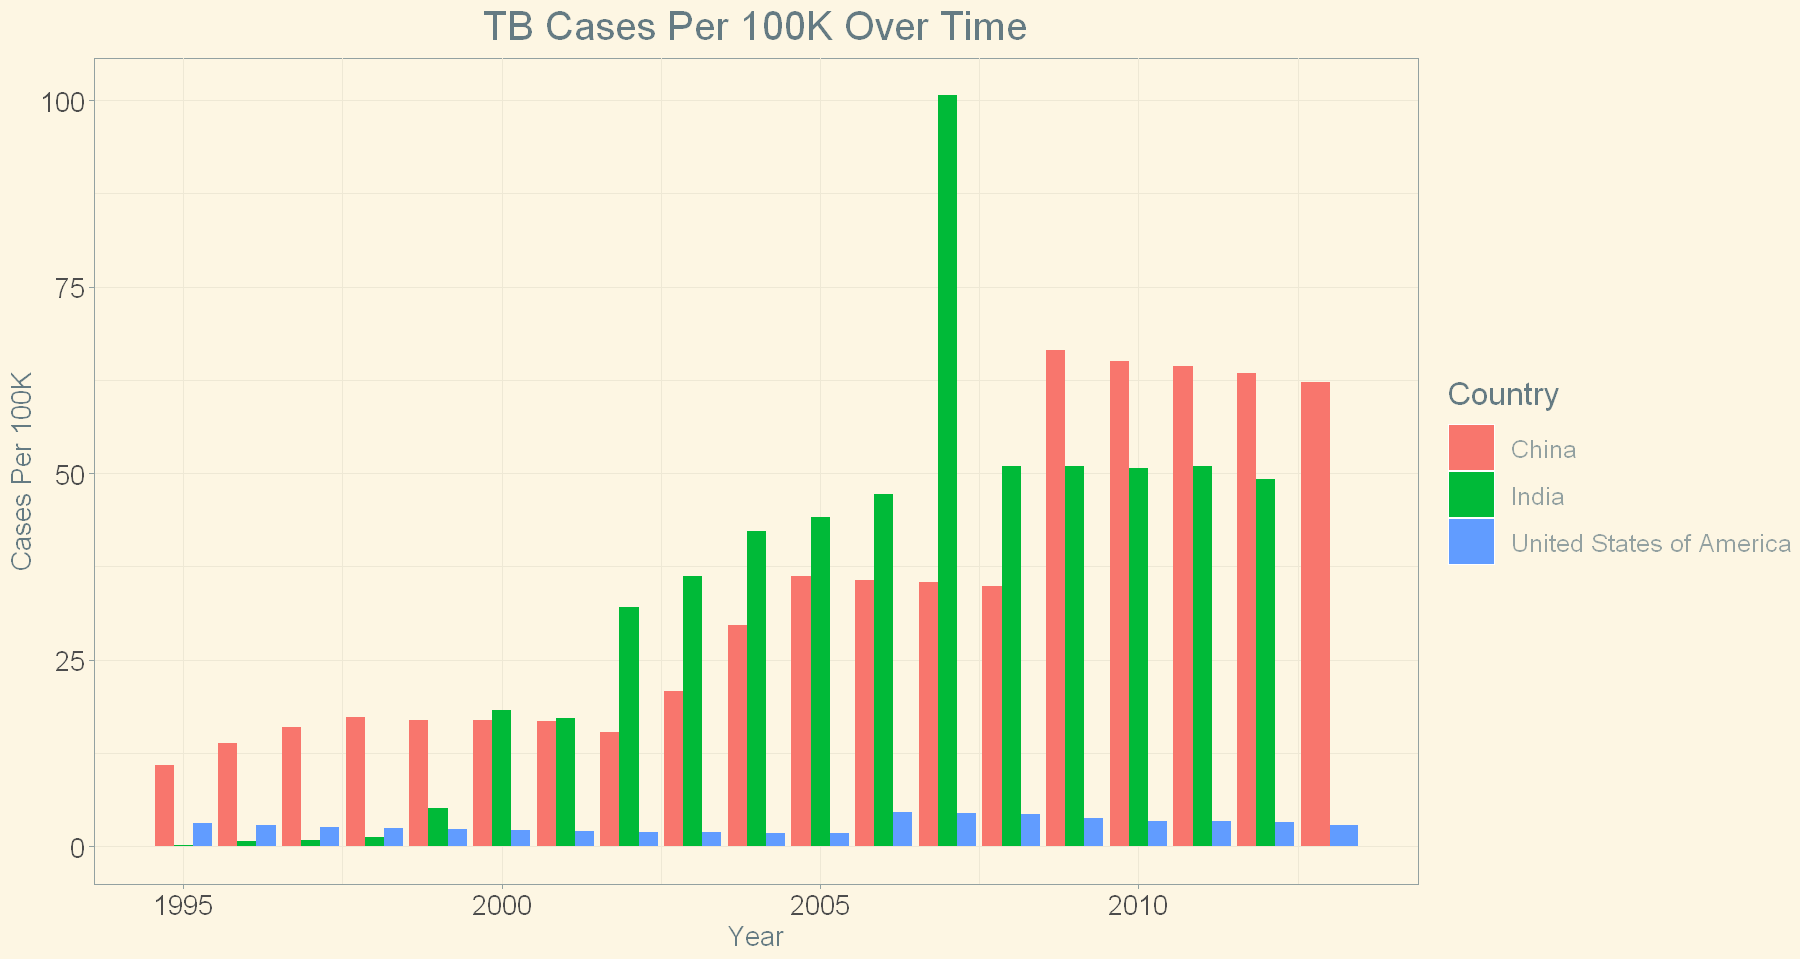

In [20]:
options(repr.plot.width = 15, repr.plot.height = 8)

tuberculosis  %>%
filter(iso3 %in% c("CHN", "IND", "USA")) %>%
group_by(country, year) %>%
summarise(cases_per_100k = sum(cases)*100000 / first(population)) %>%
ggplot(aes(x=year, y=cases_per_100k, fill=country)) + 
geom_col(position = "dodge") +
    ggtitle("TB Cases Per 100K Over Time") +
    labs(x = "Year",
        y = "Cases Per 100K",
        fill = "Country") +
    theme_solarized() +
    theme(plot.title = element_text(hjust = 0.5, size = 24),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'), 
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=19),
        legend.text = element_text(size=15))

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


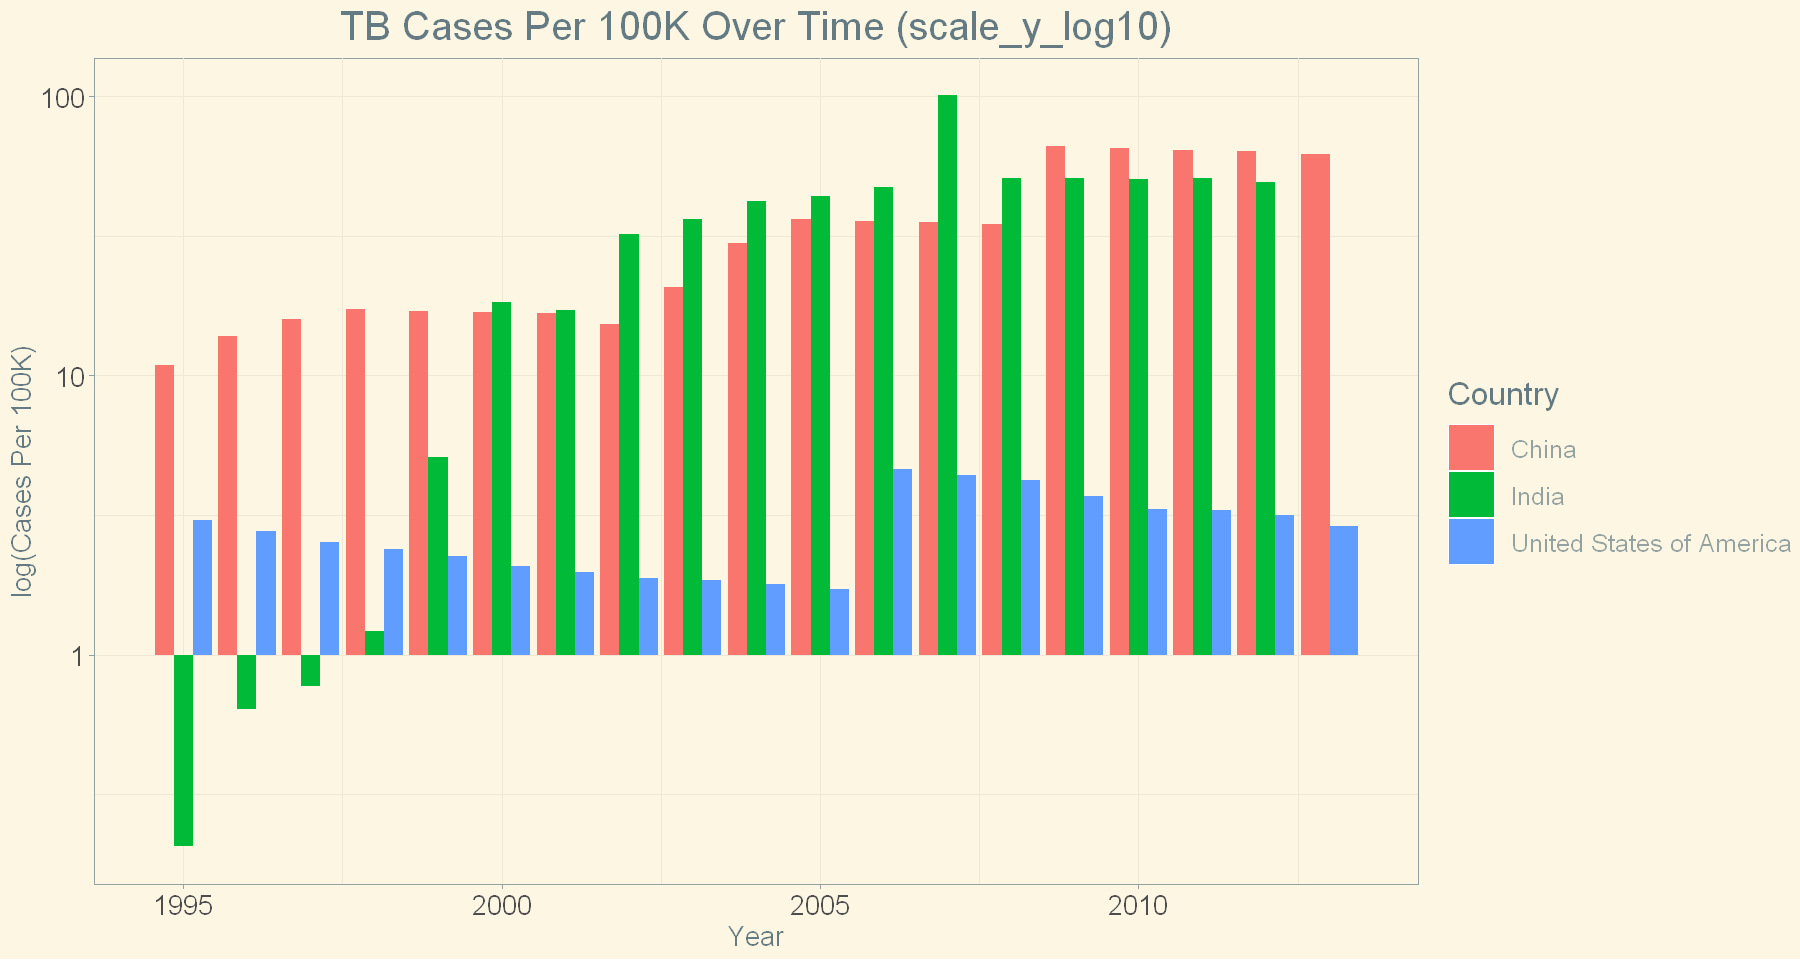

In [21]:
tuberculosis  %>%
    filter(iso3 %in% c("CHN", "IND", "USA")) %>%
    group_by(country, year) %>%
    summarise(cases_per_100k = sum(cases)*100000 / first(population)) %>%
    ggplot(aes(x = year, y = cases_per_100k, fill = country)) +
    scale_y_log10() +
    geom_col(position = "dodge") +
    ggtitle("TB Cases Per 100K Over Time (scale_y_log10)") +
    labs(x = "Year",
        y = "log(Cases Per 100K)",
        fill = "Country") +
    theme_solarized() +
    theme(plot.title = element_text(hjust = 0.5, size = 24),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16),
        legend.key.size = unit(1, 'cm'),
        legend.key.height = unit(1, 'cm'), 
        legend.key.width = unit(1, 'cm'),
        legend.title = element_text(size=19),
        legend.text = element_text(size=15))

#### Describe emerging patterns.
The figure `TB Cases Per 100K Over Time (scale_y_log10)` describes a trend in number of `Cases Per 100k` of tubercolosis from 1995 to 2013 between three countries, *China*, *India*, and *United States of America*. 

From the bar graph, it becomes clear that *USA* recorded a relative lower and unchanging cases `Cases Per 100k`of tubercolosis through the years. 

*China* on the other hand, have stable amount of cases, although highest cases among the three, during the first half but rapidly increased during the second half. This makes *China* have the highest average `Cases Per 100k`. 

*India* started the lowest (almost nothing) but quickly accumulated records exponentially, likely due to an outbreak, and they never really recovered after.

Considering the population in all three countries, *China* and *India* have got themselves full.

### Compare distributions of total cases per 100k (summed over years, sexes, and TB types) across age groups:

#### Use a log scale on the y-axis.

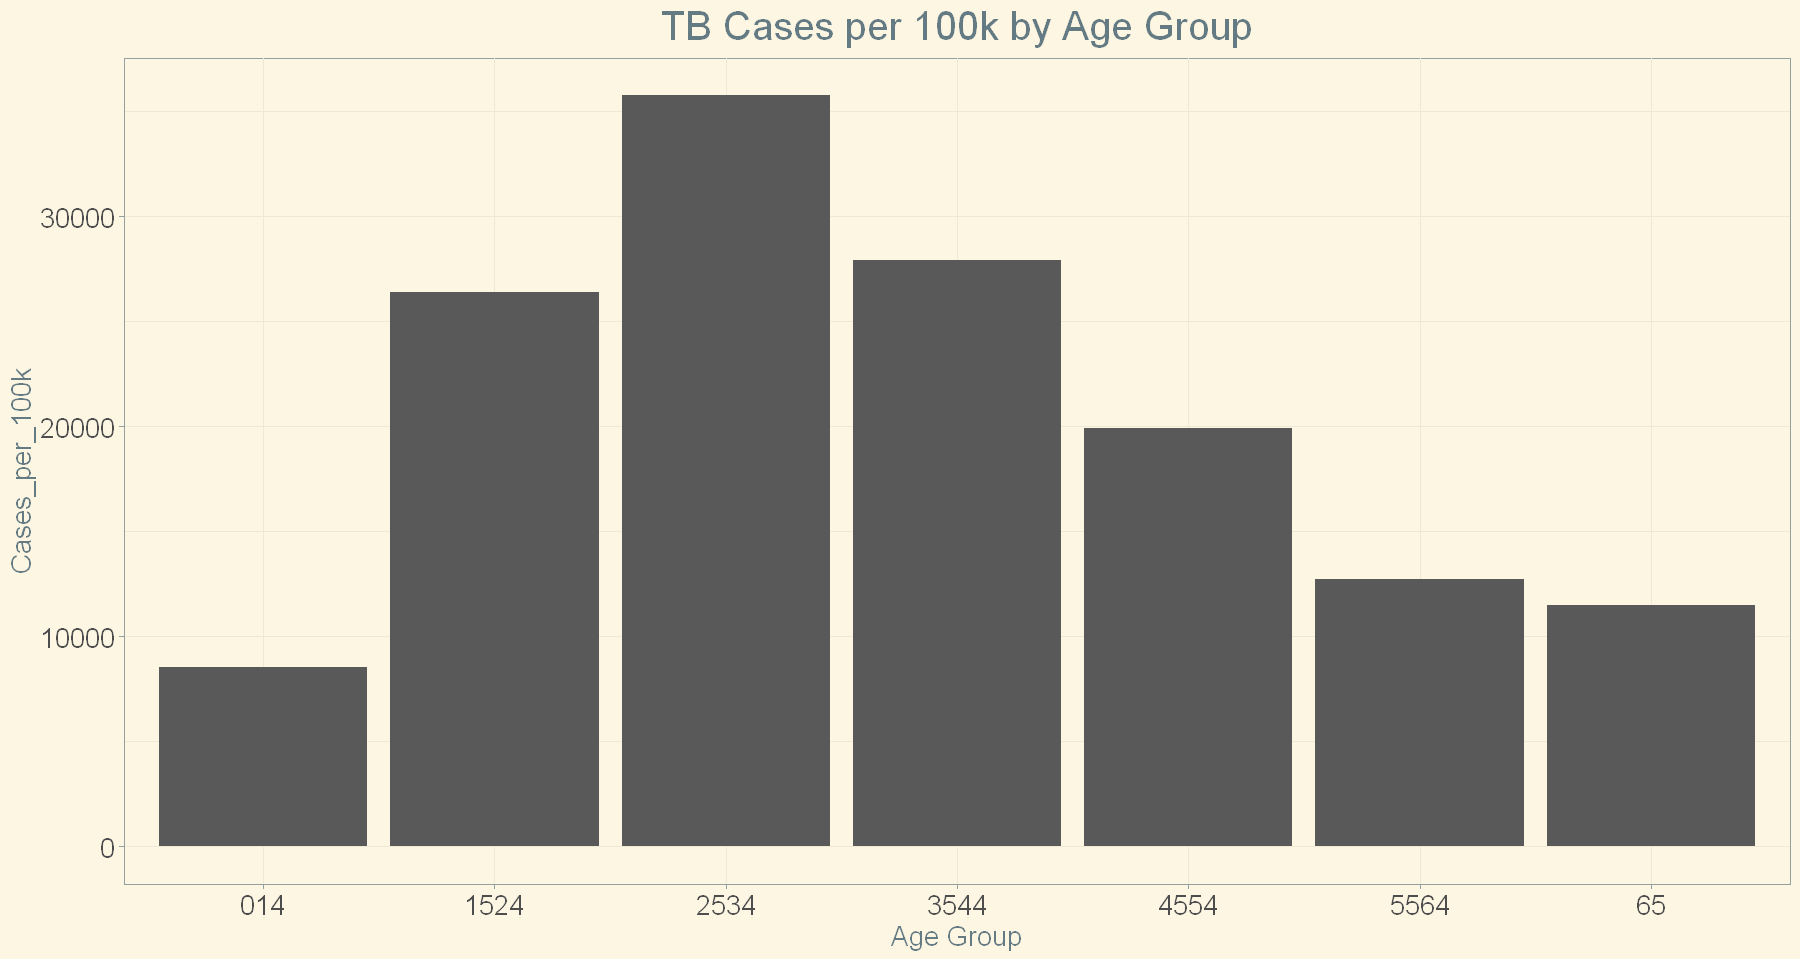

In [22]:

per100 %>%
group_by(age_group) %>%
summarise(cases_per_100k_ = sum(cases_per_100k)) %>%
ggplot() +
  geom_col(aes(x = age_group, y = cases_per_100k_)) +
  ggtitle("TB Cases per 100k by Age Group") +
  labs(x = "Age Group", y = "Cases_per_100k") +
  theme_solarized() +
  theme(plot.title = element_text(hjust = 0.5, size = 24),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16))

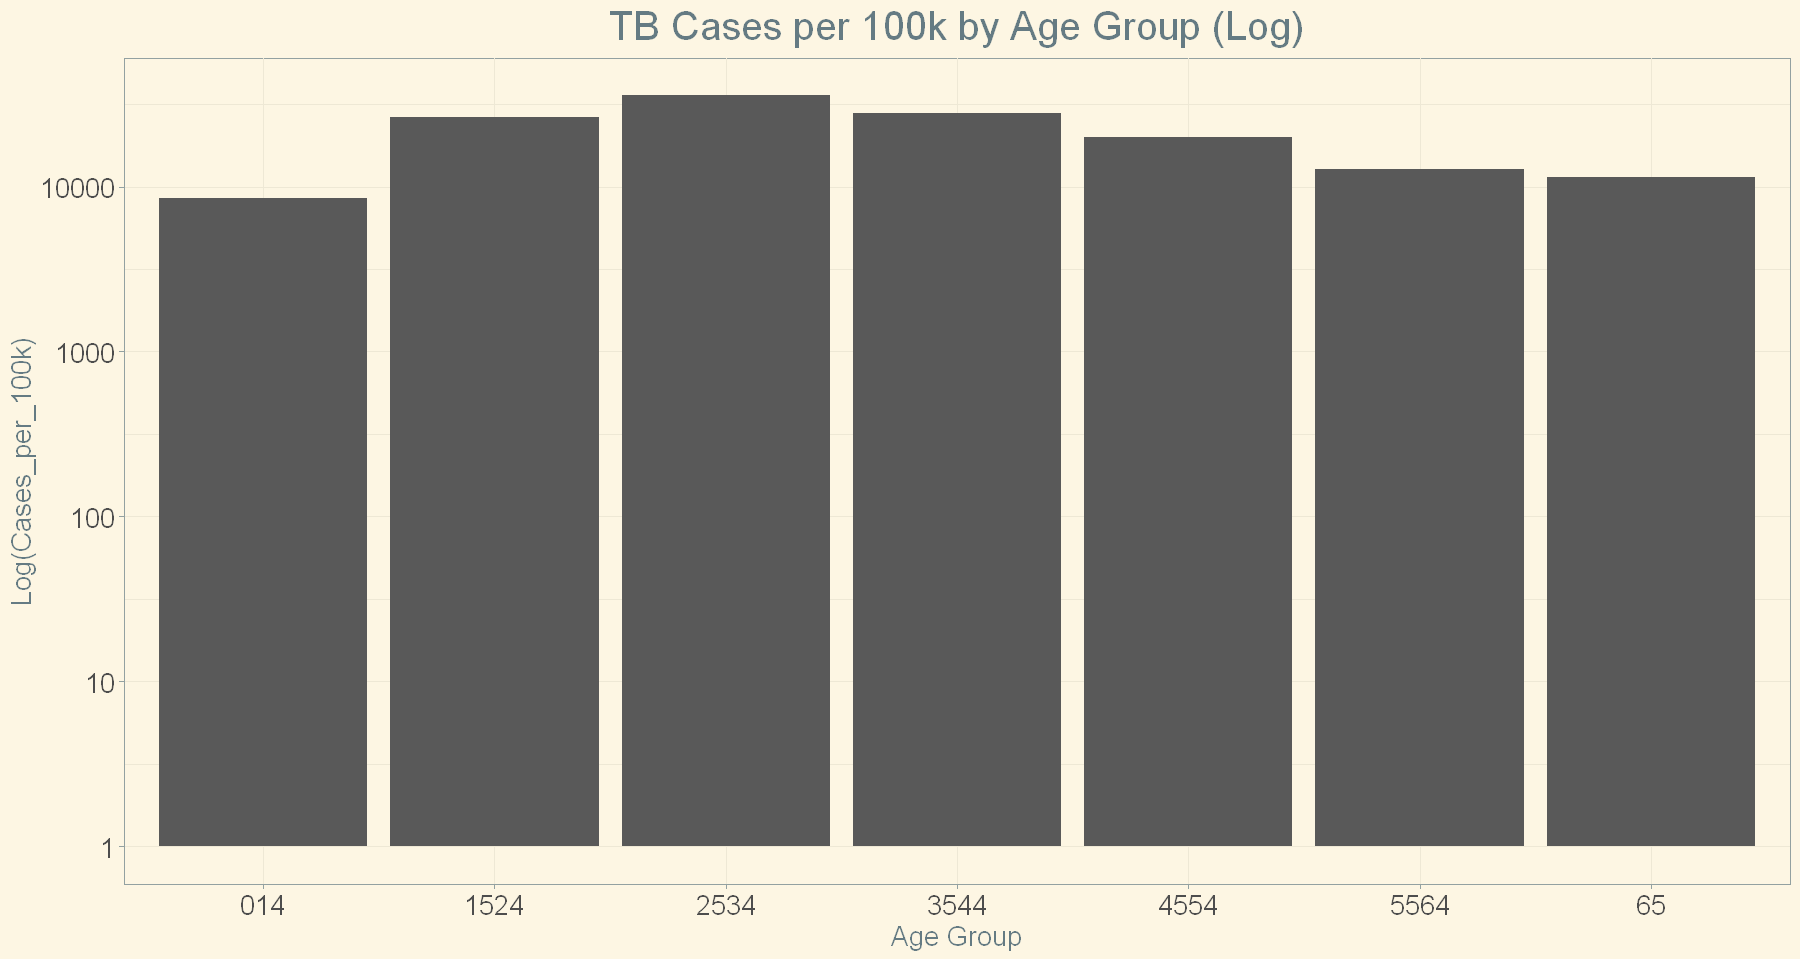

In [23]:
per100 %>%
group_by(age_group) %>%
summarise(cases_per_100k_ = sum(cases_per_100k)) %>%
ggplot() +
  geom_col(aes(x = age_group, y = cases_per_100k_)) +
  scale_y_log10() + 
  ggtitle("TB Cases per 100k by Age Group (Log)") +
  labs(x = "Age Group", y = "Log(Cases_per_100k)") +
  theme_solarized() +
  theme(plot.title = element_text(hjust = 0.5, size = 24),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16))

**Volume**: one of the most glaring pattern from the figure is the volume of`Cases per 100k` for each `Age Group`. Given that this was aggregated through about 16 years, this is to be expected. Although still alarmingly high.

**Least likely group**: It appears that as was expected, the youngest age group are the least likely to contract `tubercolosis`, compared to the other age group at least. 

**Counter Intuitive**: What's peculiar about the result is that middle aged people (15-24, 25-34, and 35-44) are more likely to contract `tubercolosis` than the older ag`Age Groups`. This is surprising considering that the common knowledge that the older people get, the weaker their immune system becomes. It goes to show that age isn't a sole factor contributing to contracting diseases like `tubercolosis`. Maybe lifestyle choice, or culture, or middle aged are just more likely to go to hospital and have themselves check, just some factors to look upon when considering a public health policy  centered around prevention of this disease. 

### Create a plot to evaluate whether the number of cases per 100k in 2000 was related to a country’s population:


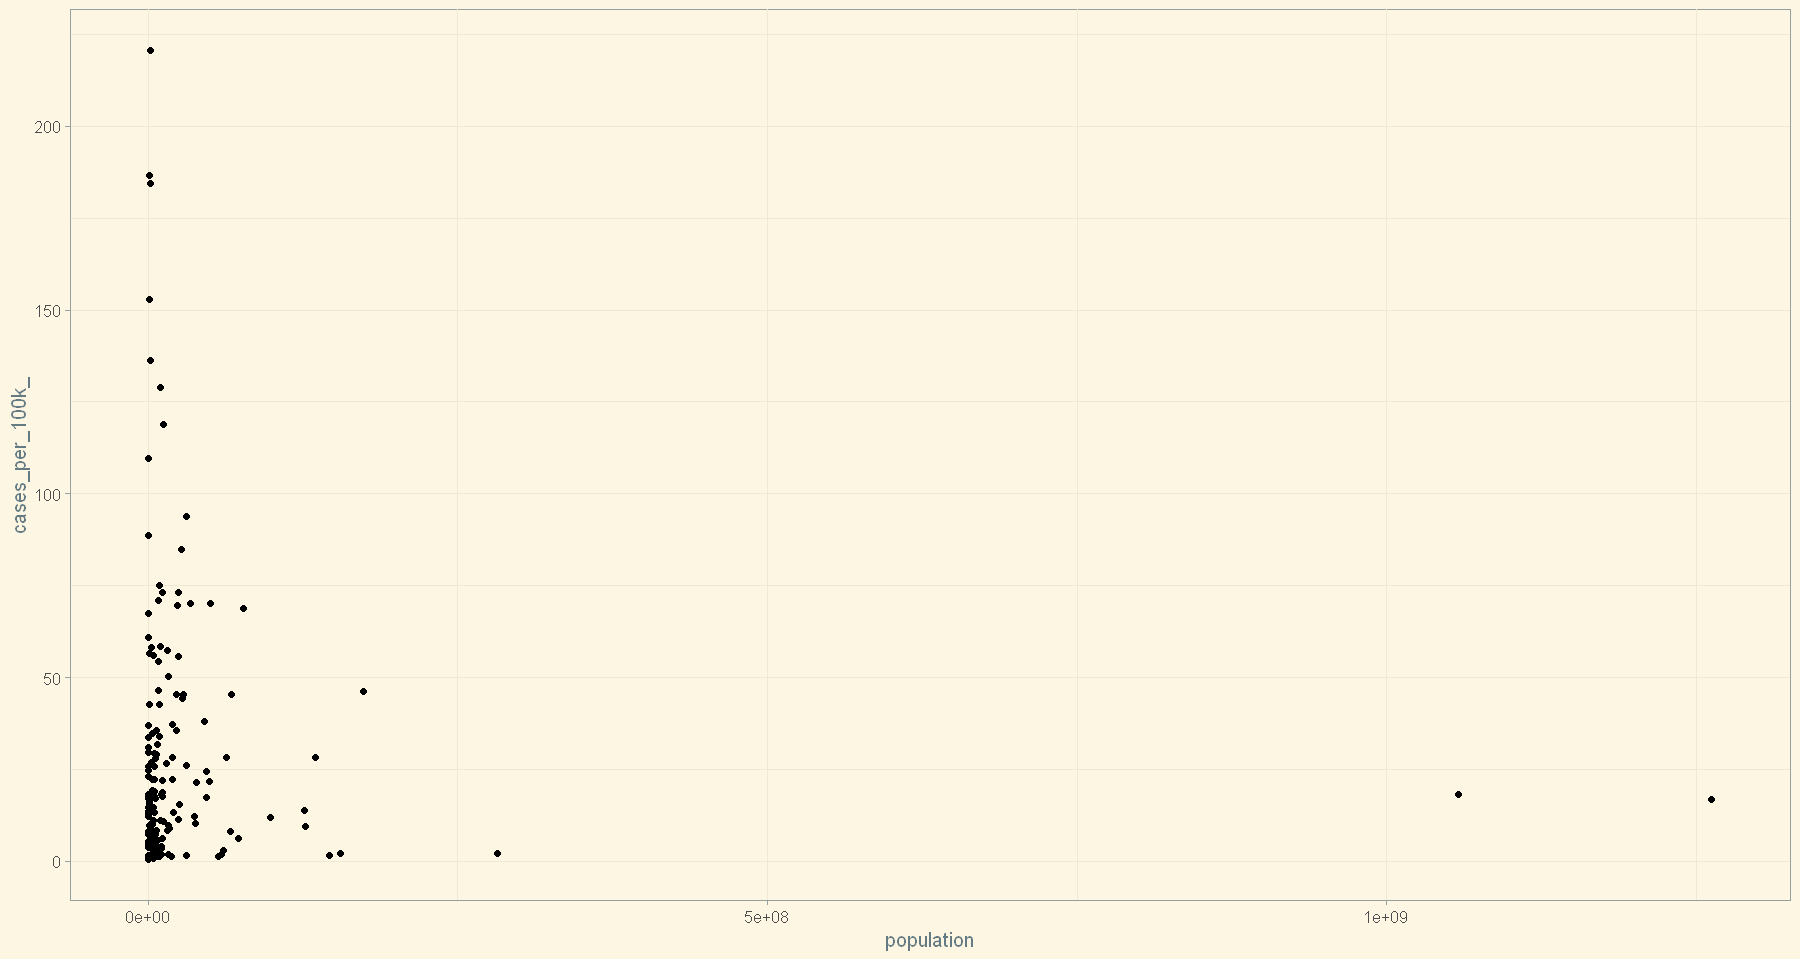

In [24]:
per100 %>%
filter(year == 2000) %>%
group_by(country) %>%
reframe(cases_per_100k_ = sum(cases_per_100k), population = min(population)) %>%
ggplot(aes(x=population, y=cases_per_100k_)) +
geom_point() +
theme_solarized()


It's hard to investigate for some trends when some significant outliers are present. Let us create another scatter plot but this time, remove the top and bottom 5% of both `population` and `cases_per_100K`

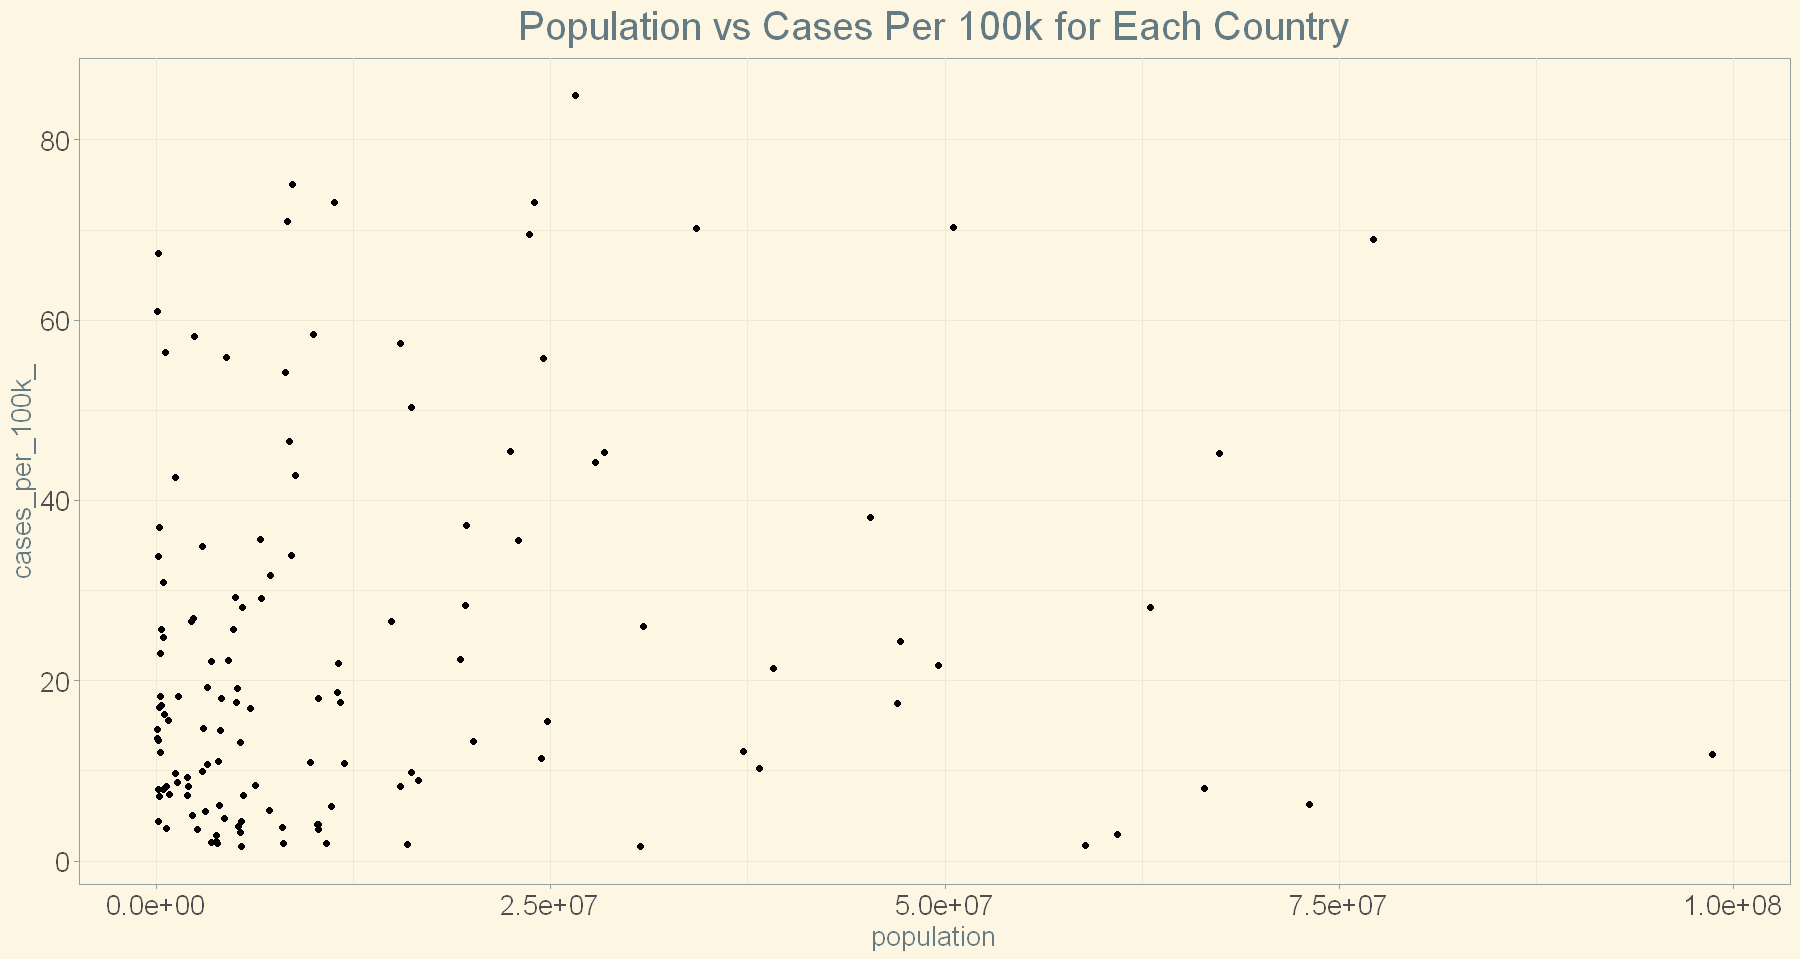

In [25]:
population_x_cases <- per100 %>%
filter(year == 2000) %>%
group_by(country) %>%
reframe(cases_per_100k_ = sum(cases_per_100k), population = min(population))

upper <- 0.95
lower <- 0.05

population_quants <- quantile(population_x_cases$population, probs = c(lower, upper))
cases_quants <- quantile(population_x_cases$cases_per_100k_, probs = c(lower, upper))

population_x_cases %>%
filter(between(x = population, left = population_quants[1], right = population_quants[2]), 
       between(x = cases_per_100k_, left = cases_quants[1], right = cases_quants[2])) %>%
ggplot(aes(x=population, y=cases_per_100k_)) +
geom_point() +
ggtitle("Population vs Cases Per 100k for Each Country") +
theme_solarized() +
theme(plot.title = element_text(hjust = 0.5, size = 24),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16))

Based on the graph `Population vs Cases Per 100k for Each Country`, we can assert that there exist *NO correlation* between `population` and `cases_per_100K`. Meaning, there's no apparent significant relationship between the two variables. Of course we could check this by calculating for correlation.  

In [34]:
cor(population_x_cases$population, population_x_cases$cases_per_100k_, use="everything")

[1] -0.05238346